In [337]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns


In [338]:
df = pd.read_csv('apple_products.csv')
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [339]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [341]:
df.duplicated().value_counts()

False    62
Name: count, dtype: int64

In [342]:
df.shape

(62, 11)

In [343]:
df.isnull()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
57,False,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,False


In [344]:
df.dropna(axis=0, inplace=True)

In [345]:
df.drop(columns=['Product URL', 'Upc'], inplace=True)

In [346]:
df.rename(columns={'Mrp':'Max Retail Price'}, inplace=True)

In [347]:
df

,Product Name,Brand,Sale Price,Max Retail Price,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",Apple,49900,49900,0,3431,356,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",Apple,84900,84900,0,3431,356,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",Apple,84900,84900,0,3431,356,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",Apple,77000,77000,0,11202,794,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",Apple,77000,77000,0,11202,794,4.5,2 GB
...,...,...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",Apple,29999,39900,24,95909,8161,4.5,4 GB
58,"APPLE iPhone 11 (Purple, 64 GB)",Apple,46999,54900,14,43470,3331,4.6,4 GB
59,"APPLE iPhone 11 (White, 64 GB)",Apple,46999,54900,14,43470,3331,4.6,4 GB
60,"APPLE iPhone 11 (Black, 64 GB)",Apple,46999,54900,14,43470,3331,4.6,4 GB


In [348]:
df['Brand'].value_counts()

Brand
Apple    62
Name: count, dtype: int64

count    62.000000
mean      4.575806
std       0.059190
min       4.500000
25%       4.500000
50%       4.600000
75%       4.600000
max       4.700000
Name: Star Rating, dtype: float64


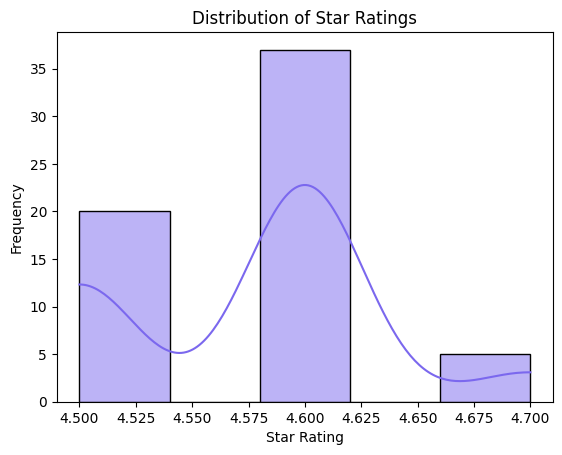

In [349]:
# Describe the Star Rating column
print(df['Star Rating'].describe())

# Plot the distribution of Star Ratings
import matplotlib.pyplot as plt
sns.histplot(df['Star Rating'], bins=5, legend=True, kde=True, color = 'mediumslateblue', fill=True, )
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.show()


In [350]:
new_df = df

In [351]:
# Define the extract_info function
new_df
import re
def extract_info(product_name):
    pattern = r'(.+)\s\((.+),\s(\d+ GB)\)'
    match = re.match(pattern, product_name)
    if match:
        name = match.group(1)
        color = match.group(2)
        storage = match.group(3)
        return name, color, storage
    else:
        return None, None, None

# Apply the function to each row in the 'Product Name' column
new_df['Name'], new_df['Color'], new_df['Storage'] = zip(*new_df['Product Name'].apply(extract_info))

# Display the data frame with new columns
print(new_df)

                                Product Name  Brand  Sale Price  \
0          APPLE iPhone 8 Plus (Gold, 64 GB)  Apple       49900   
1   APPLE iPhone 8 Plus (Space Grey, 256 GB)  Apple       84900   
2       APPLE iPhone 8 Plus (Silver, 256 GB)  Apple       84900   
3            APPLE iPhone 8 (Silver, 256 GB)  Apple       77000   
4              APPLE iPhone 8 (Gold, 256 GB)  Apple       77000   
..                                       ...    ...         ...   
57            APPLE iPhone SE (Black, 64 GB)  Apple       29999   
58           APPLE iPhone 11 (Purple, 64 GB)  Apple       46999   
59            APPLE iPhone 11 (White, 64 GB)  Apple       46999   
60            APPLE iPhone 11 (Black, 64 GB)  Apple       46999   
61              APPLE iPhone 11 (Red, 64 GB)  Apple       46999   

    Max Retail Price  Discount Percentage  Number Of Ratings  \
0              49900                    0               3431   
1              84900                    0               3431   
2  

In [352]:
new_df.head()

,Product Name,Brand,Sale Price,Max Retail Price,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating,Ram,Name,Color,Storage
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",Apple,49900,49900,0,3431,356,4.6,2 GB,APPLE iPhone 8 Plus,Gold,64 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",Apple,84900,84900,0,3431,356,4.6,2 GB,APPLE iPhone 8 Plus,Space Grey,256 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",Apple,84900,84900,0,3431,356,4.6,2 GB,APPLE iPhone 8 Plus,Silver,256 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",Apple,77000,77000,0,11202,794,4.5,2 GB,APPLE iPhone 8,Silver,256 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",Apple,77000,77000,0,11202,794,4.5,2 GB,APPLE iPhone 8,Gold,256 GB


In [353]:
new_df['Color'].iloc[9:10] = 'Red'

C:\Users\q1\AppData\Local\Temp\ipykernel_11944\1649223816.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\q1\AppData\Local\Temp\ipykernel_11944\1649223816.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of 

<Axes: >

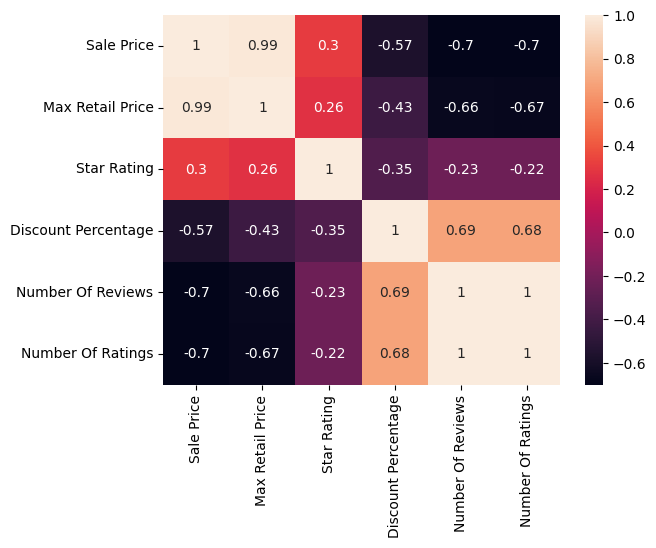

In [354]:
new_df[['Sale Price', 'Max Retail Price', 'Star Rating', 'Discount Percentage']].corr()
sns.heatmap(new_df[['Sale Price', 'Max Retail Price', 'Star Rating', 'Discount Percentage', 'Number Of Reviews', 'Number Of Ratings']].corr(), annot=True)

<Axes: >

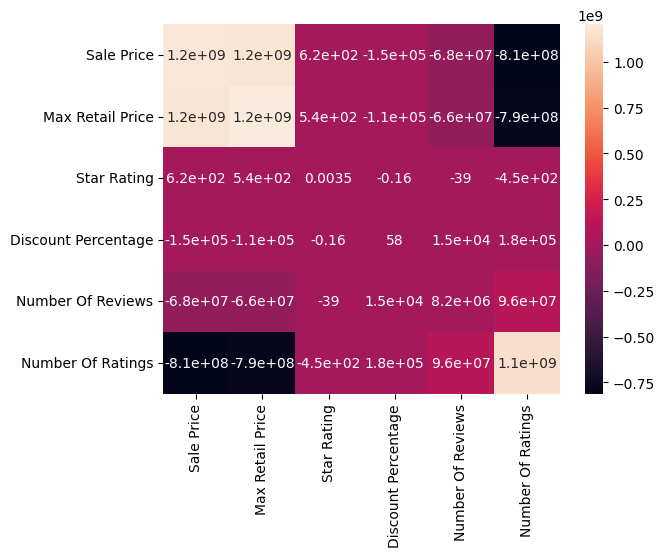

In [355]:
new_df[['Sale Price', 'Max Retail Price', 'Star Rating', 'Discount Percentage']].cov()
sns.heatmap(new_df[['Sale Price', 'Max Retail Price', 'Star Rating', 'Discount Percentage', 'Number Of Reviews', 'Number Of Ratings']].cov(), annot=True)

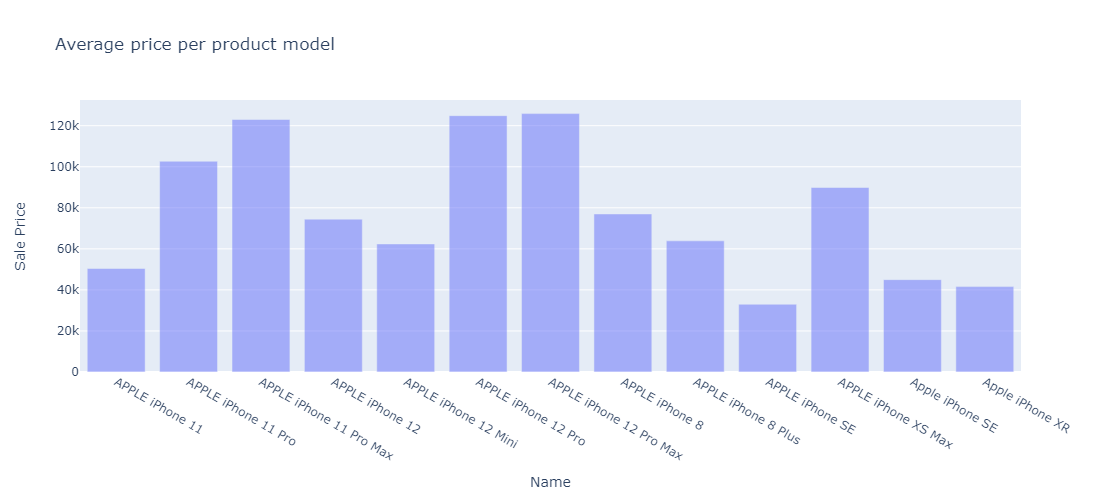

In [356]:
# Average price of product by model type
avg_product_cost = new_df.groupby('Name')['Sale Price'].mean()
fig = px.bar(avg_product_cost, x= avg_product_cost.index, y='Sale Price', title="Average price per product model", orientation='v', height=500, barmode='overlay')
fig.show()


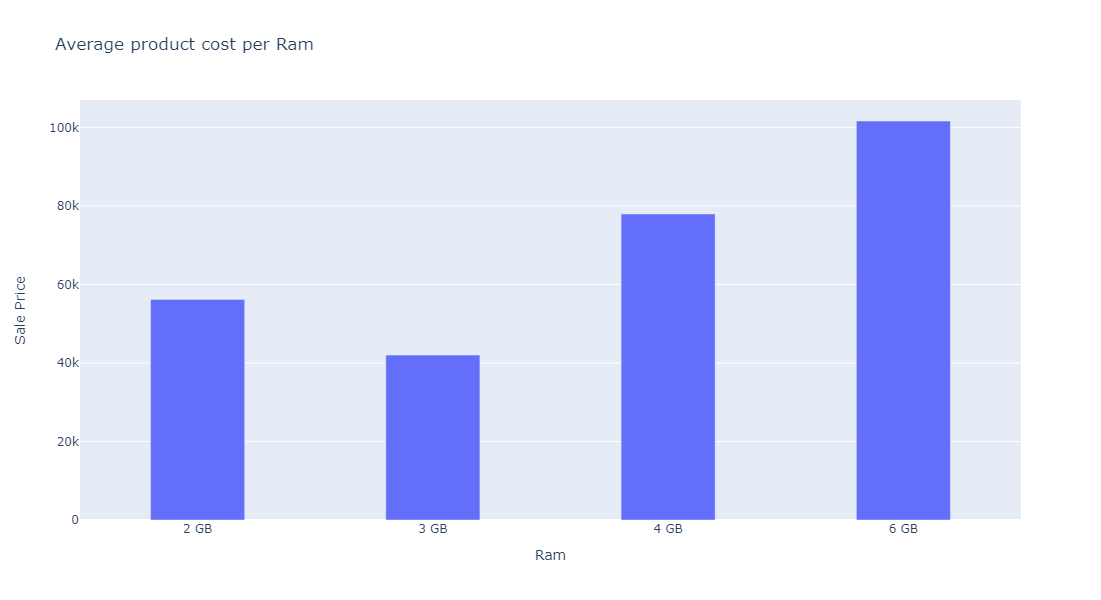

In [357]:
# Average cost of product by RAM size
avg_product_cost_perRam = new_df.groupby('Ram')['Sale Price'].mean()
fig = px.bar(avg_product_cost_perRam, x= avg_product_cost_perRam.index, y='Sale Price', width=700, height = 600, barmode='group', title='Average product cost per Ram')
fig.update_traces(width=0.4)

fig.show()

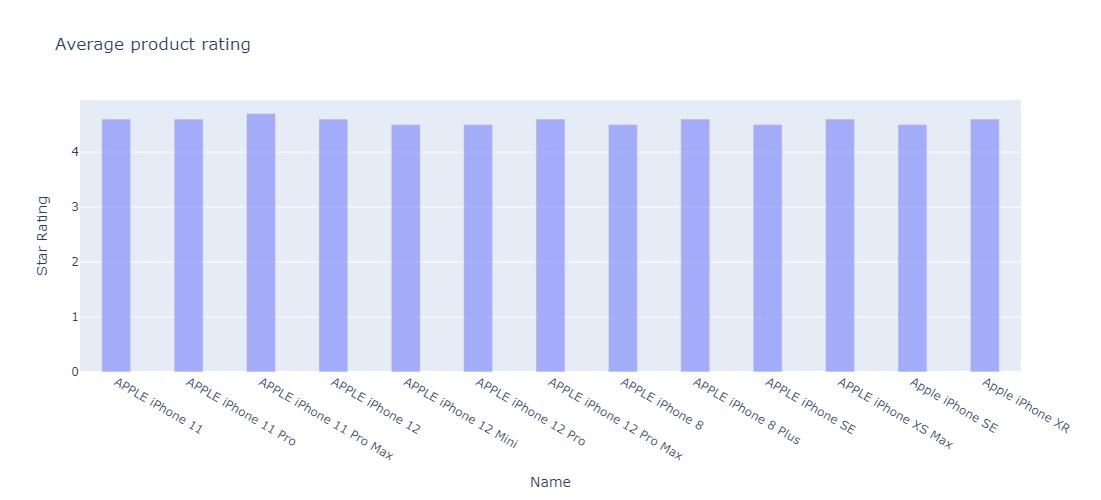

In [358]:
# Average product rating by product
avg_product_rating = new_df.groupby('Name')['Star Rating'].mean()
fig = px.bar(avg_product_rating, x= avg_product_rating.index, y='Star Rating', width=800, height = 500, barmode='overlay', title='Average product rating')
fig.update_traces(width=0.4)

fig.show()

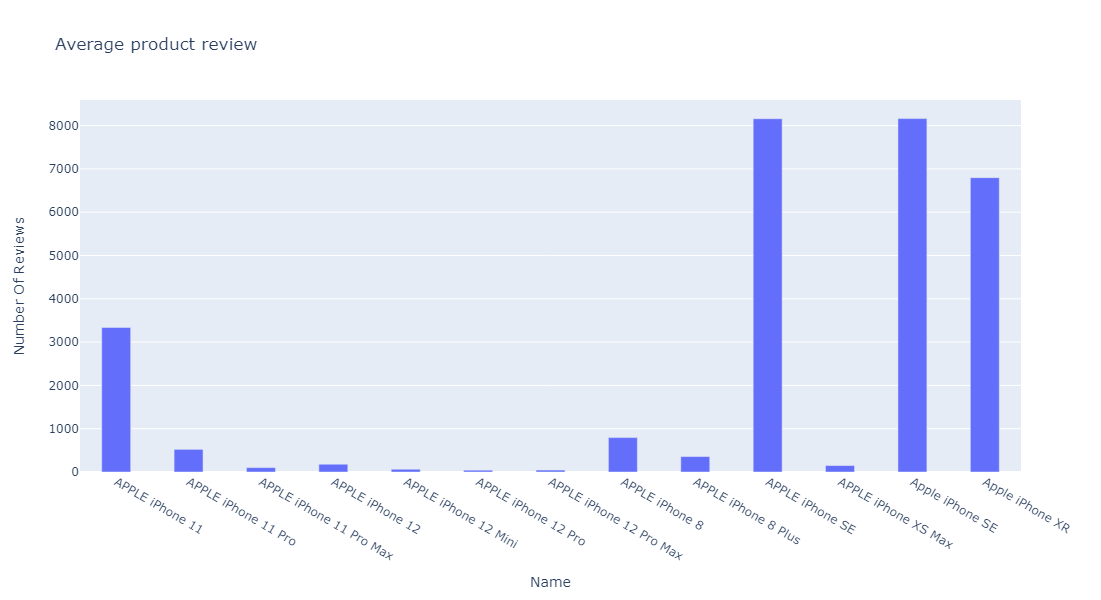

In [359]:
# Average number of reviews for each product
avg_product_reviews = new_df.groupby('Name')['Number Of Reviews'].mean()
fig = px.bar(avg_product_reviews, x= avg_product_reviews.index, y='Number Of Reviews', width=800, height = 600, barmode='group', title='Average product review')
fig.update_traces(width=0.4)

fig.show()

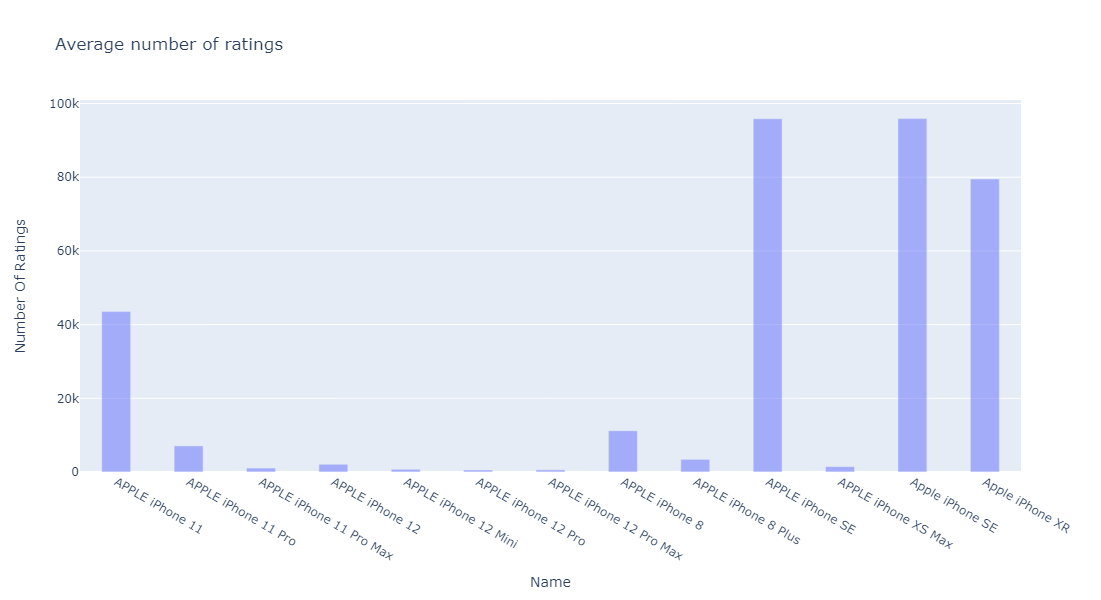

In [360]:
# Average number of ratings for each product type
avg_number_ratings = new_df.groupby('Name')['Number Of Ratings'].mean()
fig = px.bar(avg_number_ratings, x= avg_number_ratings.index, y='Number Of Ratings', width=800, height = 600, barmode='overlay', title='Average number of ratings')
fig.update_traces(width=0.4)

fig.show()

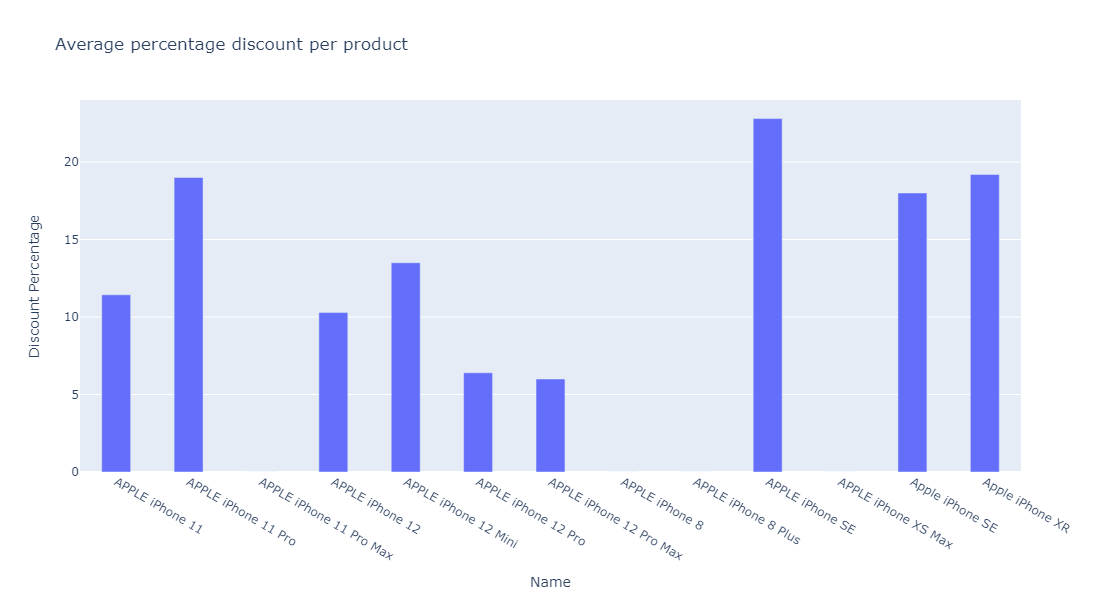

In [361]:
# Average percentage discount per product
avg_discount_percent = new_df.groupby('Name')['Discount Percentage'].mean()
fig = px.bar(avg_discount_percent, x= avg_discount_percent.index, y='Discount Percentage', width=800, height = 600, barmode='group', title='Average percentage discount per product')
fig.update_traces(width=0.4)

fig.show()

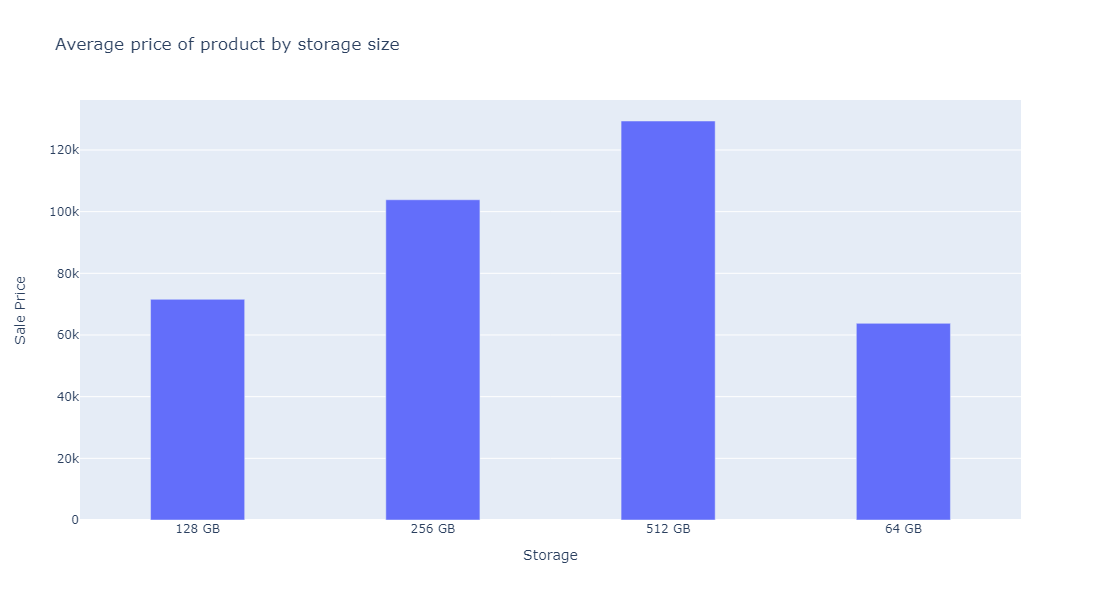

In [362]:
# Average price of product by storage size
avg_storage_price = new_df.groupby('Storage')['Sale Price'].mean()
fig = px.bar(avg_storage_price, x= avg_storage_price.index, y='Sale Price', width=800, height = 600, barmode='group', title='Average price of product by storage size')
fig.update_traces(width=0.4)
fig.show()

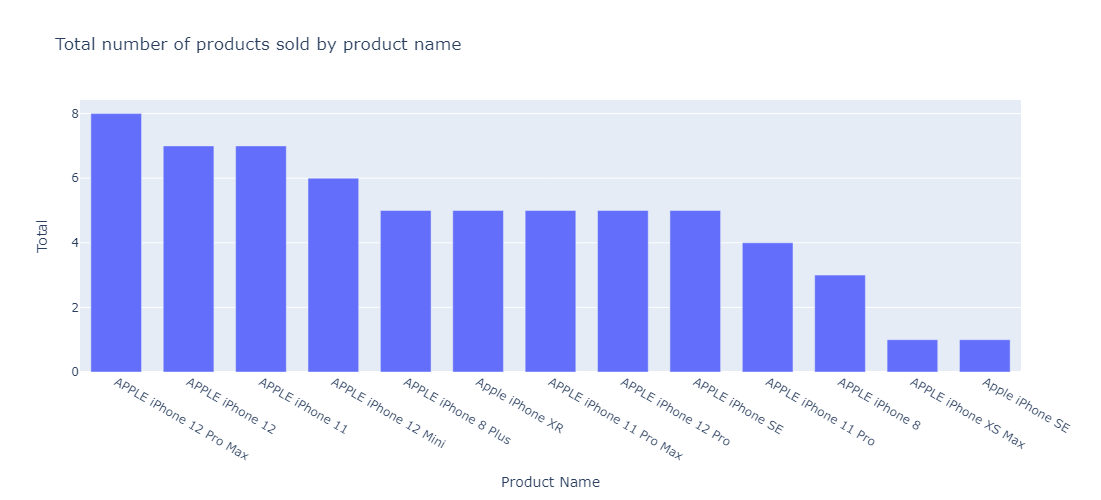

In [363]:
# Total number of product sold by product name
popular_product = new_df['Name'].value_counts()
fig = px.bar(popular_product, x=popular_product.index, y=popular_product.values,  title='Total number of products sold by product name', height=500).update_layout(yaxis_title='Total', xaxis_title='Product Name')
fig.update_traces(width=0.7)
fig.show()

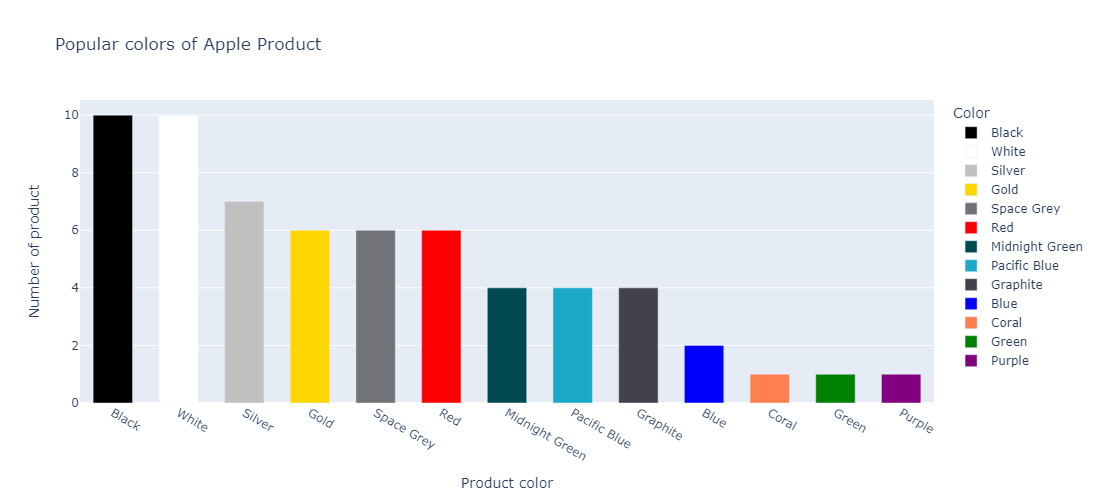

In [364]:
# Popular colors of Apple products
popular_color = new_df['Color'].value_counts()
popular_color
fig = px.bar(popular_color, x= popular_color.index, y=popular_color.values, height=500, width=900, title='Popular colors of Apple Product',  color=popular_color.index,
              color_discrete_map={
                        'Black': 'black',
                        'White': 'White',
              'Silver': 'Silver',
              'Gold': 'gold',
              'Space Grey': '#717378',
            'Red': 'red',
              'Midnight Green': '#004953',
              'Pacific Blue': '#1ca9c9',
              'Graphite': '#41424C',
              'Blue': 'blue',
              'Coral': 'coral',
              'Green': 'green',
              'Purple': 'purple'})
fig.update_layout(xaxis_title='Product color', yaxis_title='Number of product')
fig.update_traces(width=0.6)
fig.show()